In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
if df.isnull().sum().any():
    df.dropna(inplace=True)

In [4]:
X = df.drop(columns=['target'])
Y = df['target']

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Naive Bayes': GaussianNB(),
    'SVM': SVC(probability=True),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}
results = {}

for name, model in models.items():
    model.fit(X_train, Y_train)

    Y_pred = model.predict(X_test)

    acc_report = classification_report(Y_test, Y_pred, output_dict=True)
    results[name] = {
        'accuracy': acc_report['accuracy'],
        'precision': acc_report['1']['precision'],
        'recall': acc_report['1']['recall'],
        'f1-score': acc_report['1']['f1-score']
    }

    cm = confusion_matrix(Y_test, Y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot()
    plt.title(f'Confusion Matrix - {name}')
    plt.savefig(f'confusion_matrix_{name.replace(" ", "_").lower()}.png')
    plt.close()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


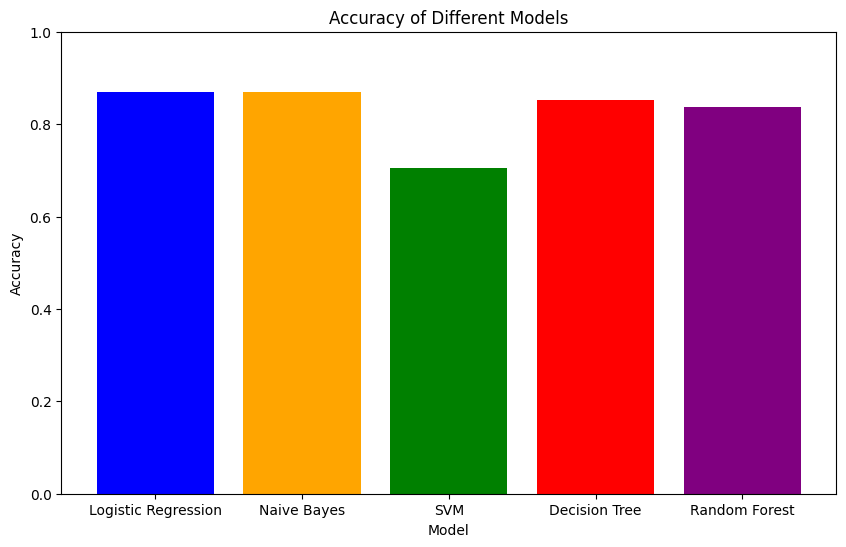

Le meilleur modèle est Logistic Regression avec une précision de 0.87


In [8]:
accuracies = [results[model]['accuracy'] for model in results]
model_names = list(results.keys())

plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies, color=['blue', 'orange', 'green', 'red', 'purple'])
plt.title('Accuracy of Different Models')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.savefig('model_accuracies.png')
plt.show()

best_model = max(results, key=lambda x: results[x]['accuracy'])
print(f"Le meilleur modèle est {best_model} avec une précision de {results[best_model]['accuracy']:.2f}")
